In [ ]:
!pip install torch;
!pip install keras



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import torch
import keras
import matplotlib 
import pandas as pd
import sklearn
import numpy as np
import torch

In [2]:
from tqdm import tqdm_notebook
from torch import nn

#загрузим датасет

In [3]:
from keras.datasets import mnist
 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))


11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


#нарисуем некоторые картинки

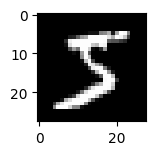

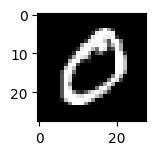

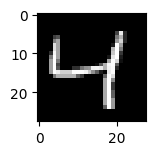

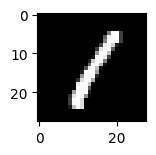

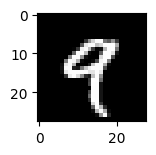

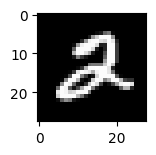

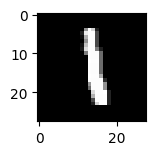

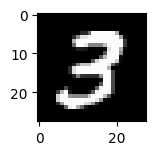

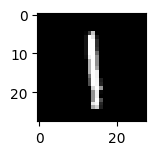

In [4]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

#сделаем датасет плоской таблицей
#с количеством строк равному количеству примеров и столбцами как признаками отвечающими за каждый пиксель




In [5]:
X_train= X_train.reshape(60000, 28 *28)

traindataset=pd.DataFrame(X_train)
traindataset['label']=y_train
notlabel=[i for i in range(28*28)]

traindataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


#обучим 9 логрегрессий для каждого класса и потом будем извлекать логиты и засовывать их в софтмакс

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [7]:
#scaler = StandardScaler()
#scaler.fit(traindataset[notlabel])
#traindataset[notlabel]=scaler.transform(traindataset[notlabel])
models=[]
for i in tqdm(range(10)):
  newdataset=traindataset.copy()
  for j in range(len(traindataset['label'])):
    if newdataset['label'][j]==i:
      newdataset['label'][j]=1
      
    else:
      newdataset['label'][j]=0
      
  print(newdataset['label'].unique())
  currentmodel=LogisticRegression()
  currentmodel.fit(X=newdataset[notlabel],y=newdataset['label'])
  models.append(currentmodel)

  0%|          | 0/10 [00:00<?, ?it/s]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 10%|█         | 1/10 [00:22<03:24, 22.68s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 20%|██        | 2/10 [00:40<02:36, 19.60s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 30%|███       | 3/10 [00:57<02:11, 18.76s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 40%|████      | 4/10 [01:14<01:47, 17.99s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 50%|█████     | 5/10 [01:32<01:29, 17.95s/it]

[1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 60%|██████    | 6/10 [01:47<01:08, 17.00s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 70%|███████   | 7/10 [02:03<00:49, 16.48s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 8/10 [02:18<00:32, 16.08s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 90%|█████████ | 9/10 [02:34<00:15, 15.99s/it]

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 10/10 [02:49<00:00, 16.93s/it]


In [8]:
X_test= X_test.reshape(10000, 28 *28)

testdataset=pd.DataFrame(X_test)
testdataset['label']=y_test
#testdataset[notlabel]=scaler.transform(testdataset[notlabel])
count=0
for i in range(len(y_test)):
  softmax=[]
  for m in models:
    softmax.append(m.coef_@X_test[i])
   
    
    
  softmax=np.exp(softmax)/np.exp(softmax).sum()
  
  if softmax.argmax()==y_test[i]:
    count=count+1
print(count/len(y_test))



0.9177


Проверим на примере случайной кратинки


1

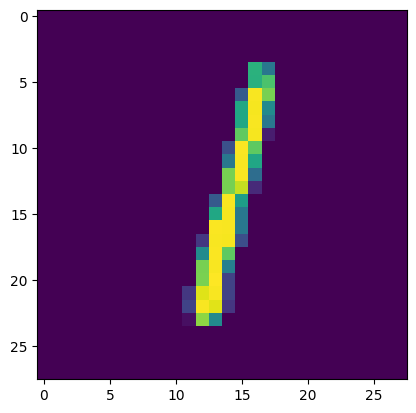

In [9]:
from pandas.io.formats.style import plt
i=835
plt.imshow(X_test[i].reshape(28,28))
softmax=[]
for m in models:
  softmax.append(m.coef_@X_test[i])

    
softmax=np.exp(softmax)/np.exp(softmax).sum()

softmax.argmax()


In [10]:
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

теперь напишем сверточную нейронную сеть

In [11]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=10,kernel_size=5)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2=nn.Conv2d(in_channels=10,out_channels=15,kernel_size=5)
    self.ln1=nn.Linear(in_features=15*4*4,out_features=300)
    self.ln2=nn.Linear(in_features=300,out_features=100)
    self.ln3=nn.Linear(in_features=100,out_features=50)
    self.ln4=nn.Linear(in_features=50,out_features=10)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
   
    x=x.reshape(-1,15*16)
    x=F.relu(self.ln1(x))   
    x=F.relu(self.ln2(x))
    x=F.relu(self.ln3(x))
    x=self.ln4(x) 
    return x




генерируем батчи

In [12]:
dataset =TensorDataset(torch.Tensor(X_train),torch.Tensor(y_train))
dataloader = DataLoader(dataset, 
                        batch_size=50, 
                        shuffle=True)



In [13]:
model=CNN()
torch.Tensor(X_train)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
losses = []




In [14]:
epochs=10


for i in tqdm_notebook(range(epochs)):
  for X_batch ,y_batch in dataloader:
    y_batch=y_batch.type(torch.LongTensor)
    optimizer.zero_grad()
    y_pred=model.forward(X_batch.reshape(50,1,28,28))
    
    loss=loss_fn(y_pred,y_batch)    
    loss.backward()
    optimizer.step()
    losses.append(loss)


<ipython-input-14-657042760e81>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
from matplotlib import pyplot as plt

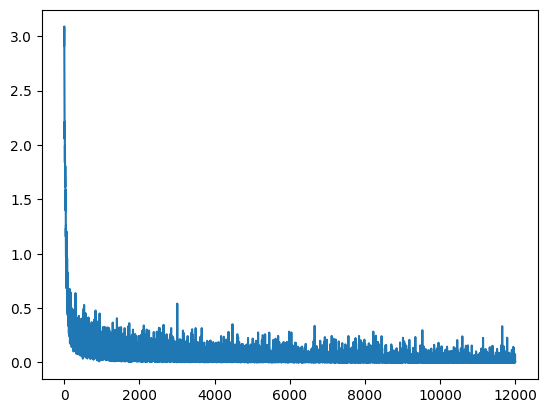

In [16]:
plt.plot([i for i in range(len(losses))],[j.detach().numpy() for j in losses])

In [17]:
dataset =TensorDataset(torch.Tensor(X_test),torch.Tensor(y_test))
testloader = DataLoader(dataset, 
                        batch_size=10000, 
                        shuffle=False)

In [32]:


from sklearn.metrics import accuracy_score
pred=[]
j=1
for X_batch,y_batch in testloader:
  for i in model.forward(X_batch.reshape(-1,1,28,28)):
    pred.append(i.argmax())
  
  pred=[int (i) for i in pred]
  y_batch=[int (i) for i in y_batch ]
  #print(pred)
  #print(y_batch)
  
  score=accuracy_score(y_pred=pred,y_true=y_batch)
  print(f'accuracy of {j} batch is {score}')
  j=j+1
  pred.clear()

accuracy of 1 batch is 0.9853


#Точность оказалась 0.9853 , что выше 0.9177 чем у многоклассовой лог регрессии 

#Выведем информацию о сети


In [21]:
from torchsummary import summary
summary(model,(1,28,28))ss

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
         MaxPool2d-2           [-1, 10, 12, 12]               0
            Conv2d-3             [-1, 15, 8, 8]           3,765
         MaxPool2d-4             [-1, 15, 4, 4]               0
            Linear-5                  [-1, 300]          72,300
            Linear-6                  [-1, 100]          30,100
            Linear-7                   [-1, 50]           5,050
            Linear-8                   [-1, 10]             510
Total params: 111,985
Trainable params: 111,985
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.43
Estimated Total Size (MB): 0.50
----------------------------------------------------------------


#Посмотрим на случайном примере


In [22]:
import random

сеть думает что это 1


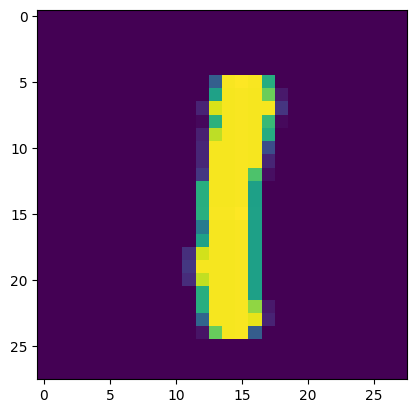

In [31]:
j =random.randint(0,9999)

x=[]
for X_batch,y_batch in testloader:
  x=X_batch[j]
  plt.imshow(x.reshape(28,28))
print(f'сеть думает что это {model.forward(x.reshape(1,1,28,28)).argmax()}')